In [29]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import cv2

(615, 820)
504300
uint8


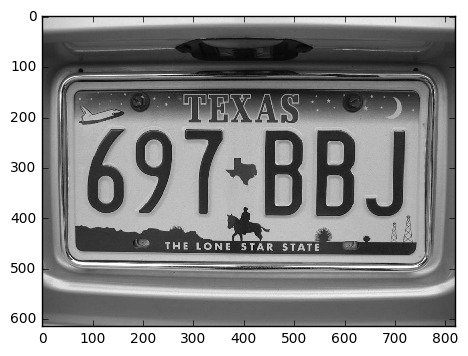

In [73]:
# how to read an image
im = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE) # IMREAD_COLOR, cv2.IMREAD_GRAYSCALE, cv2.IMREAD_UNCHANGED
# some info
print(im.shape)
print(im.size)
print(im.dtype)
# how to display an image
plt.imshow(im, cmap='gray',                        # cmap {None, 'jet', 'hsv', 'gray', ...}
           interpolation='nearest')                # interpolation {None, 'none', 'nearest', 'bilinear', 'bicubic'}
plt.show()


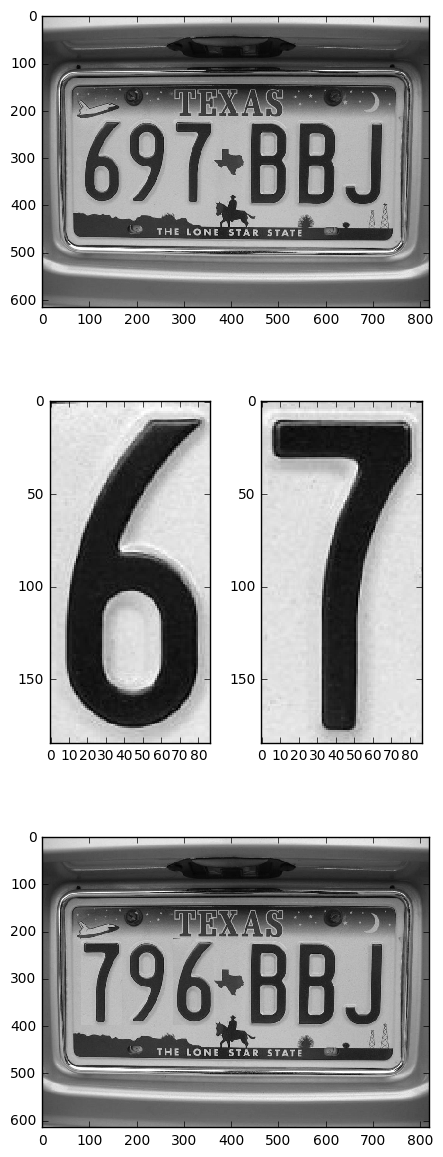

In [76]:
# 
im_no6 = im[215:400,82:169]
im_no7 = im[215:400,277:364]

im_new = im.copy()
im_new[215:400,82:169] = im_no7
im_new[215:400,277:364] = im_no6

plt.figure(1,figsize=(5,15))
plt.subplot(311), plt.imshow(im, cmap='gray', interpolation='nearest')
plt.subplot(323), plt.imshow(im_no6, cmap='gray', interpolation='nearest')
plt.subplot(324), plt.imshow(im_no7, cmap='gray', interpolation='nearest')
plt.subplot(313), plt.imshow(im_new, cmap='gray', interpolation='nearest')
plt.show()


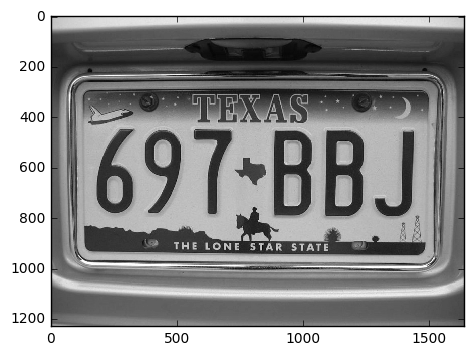

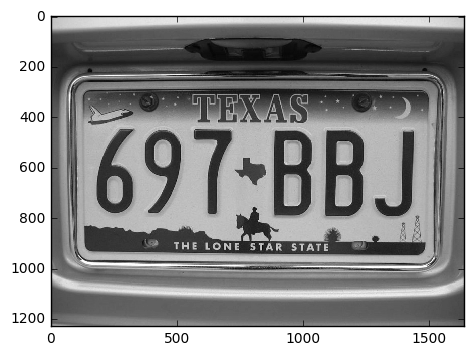

In [81]:
# scale an image
res = cv2.resize(im,None,fx=2, fy=2, interpolation = cv2.INTER_NEAREST)

plt.imshow(res, cmap='gray', interpolation='nearest')
plt.show()

height, width = im.shape[:2]
res = cv2.resize(im,(2*width, 2*height), interpolation = cv2.INTER_NEAREST)

plt.imshow(res, cmap='gray', interpolation='nearest')
plt.show()

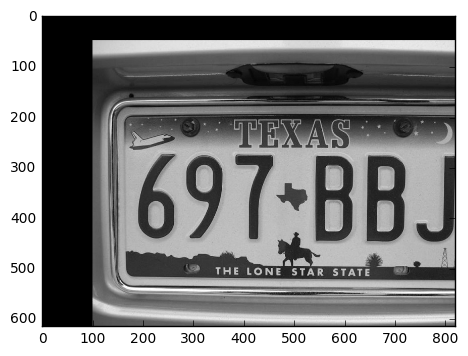

In [85]:
# translation
rows,cols = im.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(im,M,(cols,rows))
plt.imshow(dst,cmap='gray')

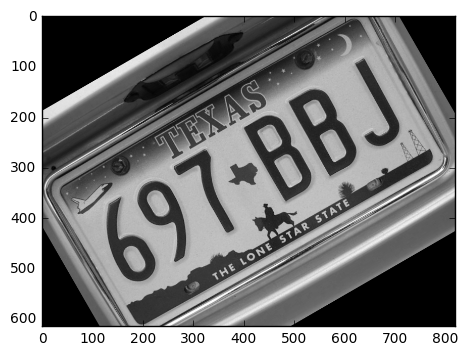

In [89]:
# rotation
rows,cols = im.shape
M = cv2.getRotationMatrix2D((cols/2,rows/2),30,1)
dst = cv2.warpAffine(im,M,(cols,rows))
plt.imshow(dst,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f4fe2c51a90>,
 <matplotlib.text.Text at 0x7f4fabdc1e90>)

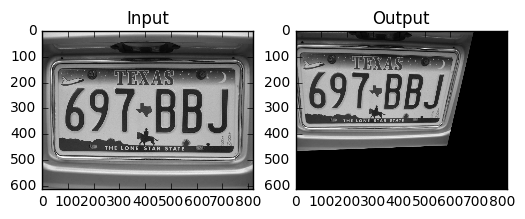

In [95]:
# perspective
rows,cols = im.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(im,M,(cols,rows))
plt.subplot(121),plt.imshow(im, cmap='gray'),plt.title('Input')
plt.subplot(122),plt.imshow(dst, cmap='gray'),plt.title('Output')